In [1]:
from array import array
import math
import numpy as np
import random
import time

In [2]:
def seedLCG(initVal):
    global rand
    rand = initVal
    
def rand_ejb():
    a = 16807
    m = 2147483647
    b = 0
    global rand
    
    rand = (a*rand + b) % m
    return rand/m

# Gaussian Random Number Generation

An interesting algorithm for Gaussian random number generation is as follows:

1. Generate a random number $r_1$ uniformly distributed in the interval $(0,1)$.
2. Generate a random number $r_2$ uniformly distributed in the interval $(0,1)$.
3. Compute $x = \sqrt{-2\ln{r_1}}\cos{(2\pi r_2)}$.
4. Compute $y = \sqrt{-2\ln{r_1}}\sin{(2\pi r_2)}$.
5. The random numbers $x$ and $y$ are statistically independent random variables with a Gaussian distribution with zero mean and unit variance.

Another algorithm for Gaussian random number generation is as follows:

1. Generate a random number $r_1$ uniformly distributed in the interval $(0,1)$.
2. Calculate an x-value according to $x = x_c - \frac{b-a}{2} + r_1*(b-a)$.
2. Generate a random number $r_2$ uniformly distributed in the interval $(0,1)$.
3. Calculate a Gaussian probability $p = e^{-\frac{(x-x_c)^2}{(2\sigma^2)}}$.
4. If $r_2 < p$, then accept the value of $x$ and go to step 5. Otherwise, go to step 1.



In [3]:
import matplotlib.pyplot as plt
import random
import time

method = 2

# Set the seed for random number generation
iseed = 1
random.seed(iseed)
seedLCG(iseed)

# Define the number of points, centroid, sigma, seed, number of bins, width, and dx
npoints = 1000000
centroid = 0
sigma = 1

nbins = 1000
width = 12.0 * sigma
dx = width / nbins
n_randoms = 0

# Generate random numbers using the EJB algorithm and fill the histograms
ticks1 = time.time()
ejb_data = []
for i in range(npoints):
    if method == 2:
        check = True
        while check:
            r1 = rand_ejb()
            n_randoms += 1
            x = centroid - width / 2.0 + width * r1
            pgauss = np.exp(-1.0 * (x - centroid) * (x - centroid) / (2.0 * sigma * sigma))
            r2 = rand_ejb()
            n_randoms += 1
            if r2 < pgauss:
                check = False
                ejb_data.append(x)
                
    elif method == 1:
        r1 = rand_ejb()
        n_randoms += 1
        r2 = rand_ejb()
        n_randoms += 1
        x = np.sqrt(-2.0 * np.log(r1)) * np.cos(2.0 * np.pi * r2)
        y = np.sqrt(-2.0 * np.log(r1)) * np.sin(2.0 * np.pi * r2)
        ejb_data.append(x)
        ejb_data.append(y)

ticks2 = time.time()
print("elapsed time = %.3f" % (ticks2 - ticks1))

# Generate random numbers using the Python random module and fill the histograms
ticks3 = time.time()
python_data = [random.gauss(centroid, sigma) for _ in range(npoints)]

ticks4 = time.time()
print("elapsed time = %.3f" % (ticks4 - ticks3))

print("Total number of randoms generated = %d" % n_randoms)
print("Uncertainty in the mean = %f" % (sigma / np.sqrt(npoints)))




elapsed time = 7.552
elapsed time = 0.393
Total number of randoms generated = 9578536
Uncertainty in the mean = 0.001000


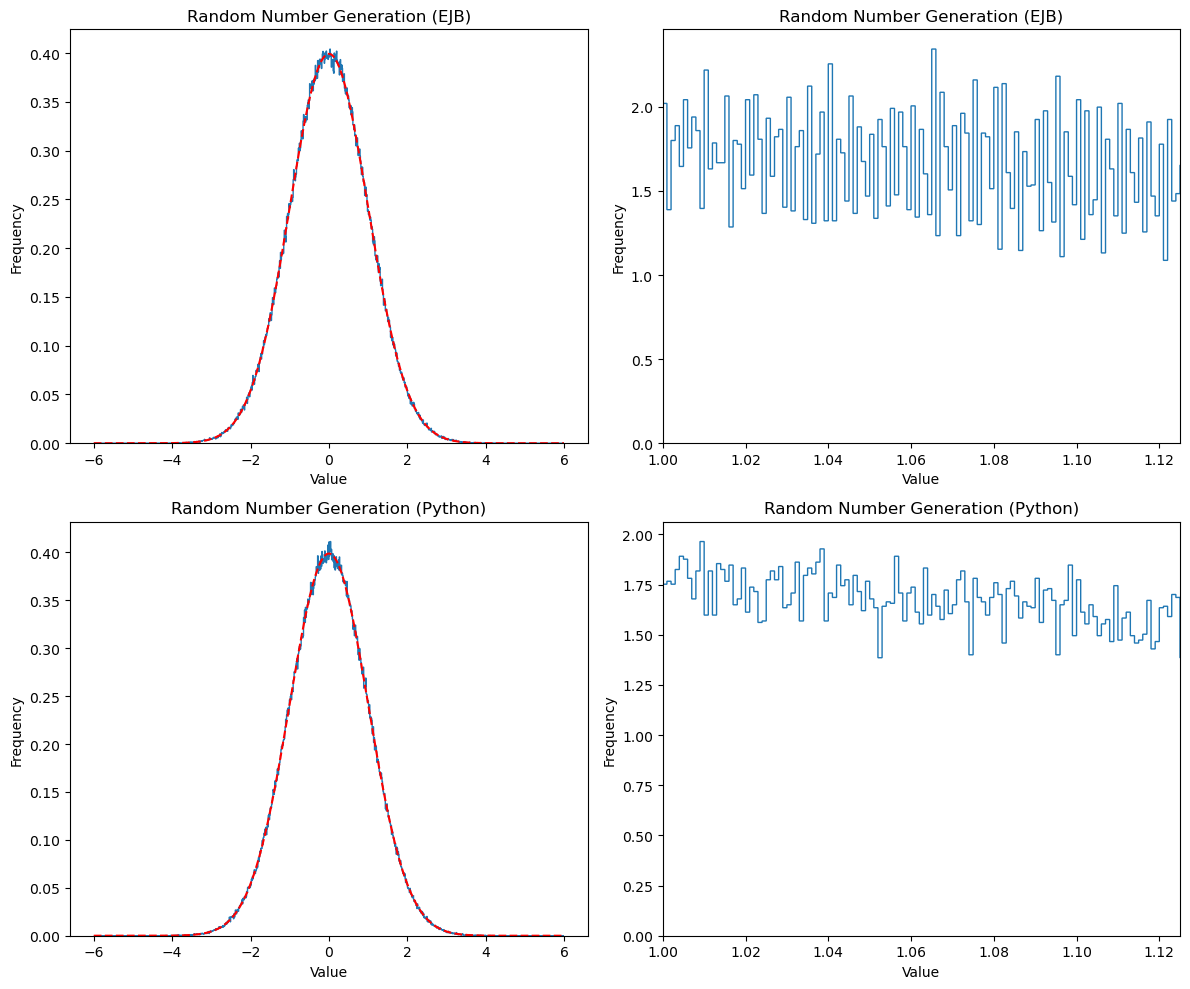

In [6]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

h1, bins1, _ = axs[0, 0].hist(ejb_data, bins=nbins, range=(centroid - width / 2.0, centroid + width / 2.0),
                              histtype='step', density=True)
h2, bins2, _ = axs[0, 1].hist(ejb_data, bins=nbins, range=(centroid + width / 12.0, centroid + width / 12.0 + width / 12.0),
                              histtype='step', density=True)
h3, bins3, _ = axs[1, 0].hist(python_data, bins=nbins, range=(centroid - width / 2.0, centroid + width / 2.0),
                              histtype='step', density=True)
h4, bins4, _ = axs[1, 1].hist(python_data, bins=nbins, range=(centroid + width / 12.0, centroid + width / 12.0 + width / 12.0),
                              histtype='step', density=True)
# Fit the histogram data with a Gaussian function
from scipy.stats import norm

fit_params1 = norm.fit(ejb_data)
fit_params3 = norm.fit(python_data)

# Plot the fitted Gaussian functions
x = np.linspace(centroid - width / 2.0, centroid + width / 2.0, nbins)
y1 = norm.pdf(x, *fit_params1)
y3 = norm.pdf(x, *fit_params3)

axs[0, 0].plot(x, y1, 'r--', label='Fit')
axs[1, 0].plot(x, y3, 'r--', label='Fit')

# Set titles for subplots
axs[0, 0].set_title('Random Number Generation (EJB)')
axs[0, 1].set_title('Random Number Generation (EJB)')
axs[1, 0].set_title('Random Number Generation (Python)')
axs[1, 1].set_title('Random Number Generation (Python)')

# Set labels for subplots
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')

axs[0, 1].set_xlim(centroid+width/12.0,centroid+width/12.0+width/96.0)
axs[1, 1].set_xlim(centroid+width/12.0,centroid+width/12.0+width/96.0)

# Show the plots
plt.tight_layout()
plt.show()
